
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction :

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.



### Dataset Description :


● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


columns:

PatientId       
AppointmentID   
Gender          
ScheduledDay    
AppointmentDay  
Age             
Neighbourhood   
Scholarship     
Hipertension    
Diabetes        
Alcoholism      
Handcap         
SMS_received    
No-show         

### General Analysis :

Factors affecting the patients to be show or not


### Project Questions:

Research Question 1 (Does Age affect patient attendance?)

Research Question 2 (Does Gender affect patient attendance?)

Research Question 3 (Does Scholarship affect patient attendance?)

Research Question 4 (Does SMS_received affect patient attendance?)

Research Question 5 (Prevalence of diabetes) in show patients dataset

Research Question 6 (Prevalence of Hipertension) in show patients dataset

Research Question 7 (Prevalence of Alcoholism) in show patients dataset


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [34]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

in this section we will load in data and check for 


In [35]:
df=pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")


load our dataset

In [36]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


investigate first three rows

In [37]:
df.shape

(110527, 14)

Dataset have 110527 (rows) and 14 columns

In [38]:
df.duplicated().sum()

0

don't have duplicated row

In [39]:
df['PatientId'].duplicated().sum()

48228

but we have 48228 duplicated patient id

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we don't have null values in our dataset

In [41]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


from this statistics we can know that is error value in age

In [42]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

no error in data type of columns


### Data Cleaning


In [43]:
invalid_age=df.query('Age == -1').index
invalid_age[0]

99832

get index of row that contain invalid age

In [44]:
df.drop(index=invalid_age[0],inplace=True)

drop row of invalid age from our dataset

In [45]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


check the minimum age

In [46]:
df.drop_duplicates(['PatientId'],inplace=True)

drop the redundancy of patients id,to make our analysis efficiency

In [47]:
df['PatientId'].duplicated().sum()

0

check of duplicated patient Id

now we remove invalid age and duplicated patient Id

In [48]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


remove unneeded columns

In [49]:
df.rename(columns={'No-show':'No_show'},inplace=True)

edit column name

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62298 entries, 0 to 110524
Data columns (total 10 columns):
Gender           62298 non-null object
Age              62298 non-null int64
Neighbourhood    62298 non-null object
Scholarship      62298 non-null int64
Hipertension     62298 non-null int64
Diabetes         62298 non-null int64
Alcoholism       62298 non-null int64
Handcap          62298 non-null int64
SMS_received     62298 non-null int64
No_show          62298 non-null object
dtypes: int64(7), object(3)
memory usage: 5.2+ MB


In [51]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000
mean,36.705496,0.092908,0.196507,0.070885,0.024174,0.020113,0.327362
std,23.531076,0.290306,0.397360,0.256635,0.153591,0.155058,0.469254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


now our data clean and ready to explore

<a id='eda'></a>
## Exploratory Data Analysis

> Now we have trimmed and cleaned our data, and ready to move on to exploration. **Compute statistics** and **create visualizations** 




### General Look

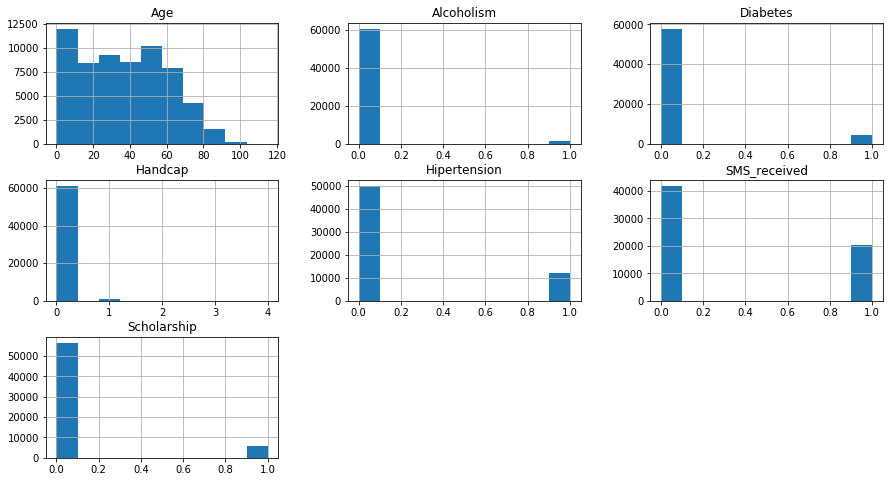

In [52]:
df.hist(figsize=(15,8));


In [53]:
df_show=df.query(" No_show == 'No' ")
df_no_show=df.query(" No_show == 'Yes' ")
df_no_show.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


split our dataset to start our Analysis

In [54]:

def attendance_index_with(col_name):
    
    ## input: name of columns that contains (int) and (one letter like gender data) only
    ## output: histogram analysis between the (column input) and (attendance of patients)
    
    
    plt.figure(figsize=(15,8))
    df_show[col_name].hist(color='b',alpha=0.5,label='show')
    df_no_show[col_name].hist(color='r',alpha=0.5,label='no show')
    plt.legend();
    plt.title("The Effect of {} on Patient Attendance".format(col_name))
    plt.xlabel("{}".format(col_name))
    plt.ylabel("Number of Patients")
    
    
    


### Research Question 1  (Does Age affect patient attendance?)

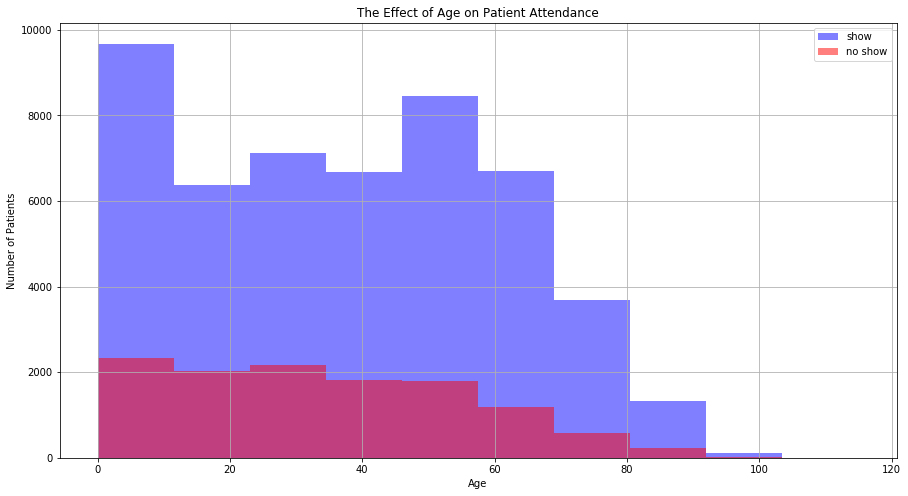

In [55]:
attendance_index_with('Age')

We see that newborns and young children are the most present, and this is a sign of parents' interest in their children.
We also see that patients between the ages of 25 and 33 have a remarkable presence, As for patients between the ages of 45 and 55 they have a high attendance and Patients over the age of 70 have a lower attendance.

### Research Question 2  (Does  Gender affect patient attendance?)

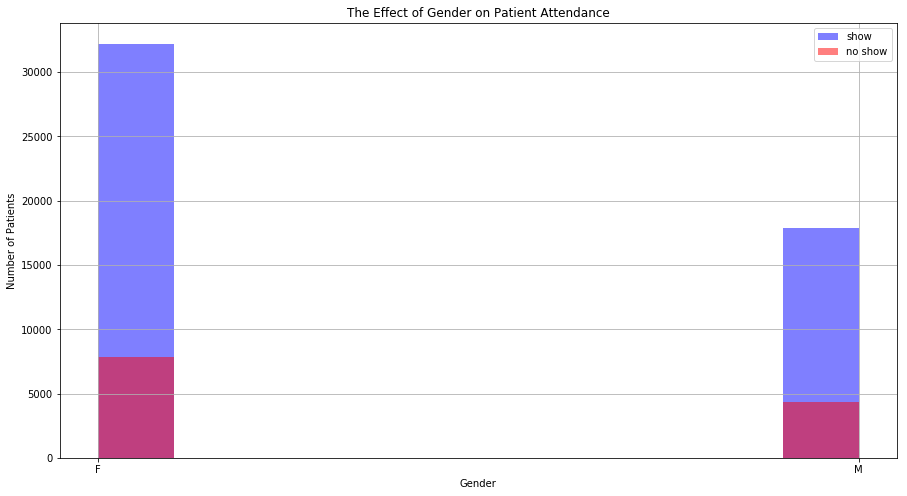

In [56]:
attendance_index_with('Gender')

The proportion of patients who attended are females is higher than males

### Research Question 3  (Does Scholarship affect patient attendance?)

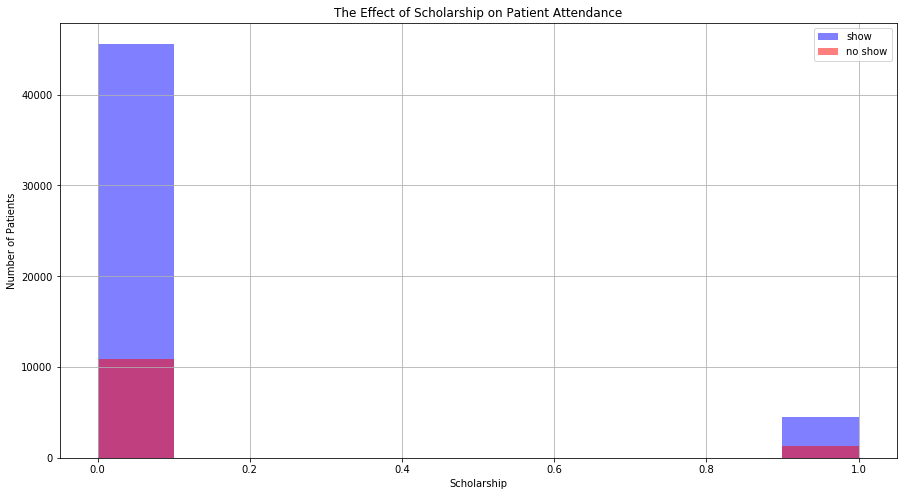

In [57]:
attendance_index_with('Scholarship')

There is no effect of the Scholarship on the attendance of patients

### Research Question 4 (Does SMS_received affect patient attendance?)

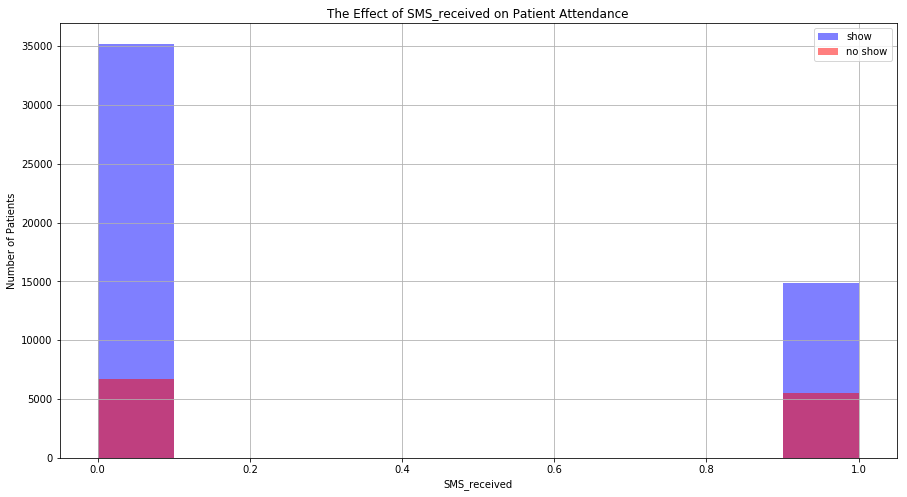

In [58]:
attendance_index_with('SMS_received')

we see that Messages were not a factor influencing attendance

### Research Question 5 (Prevalence of diabetes) in show patients dataset

In [59]:
def prevalence_of(col_name):
    
    # input: name of column  
    # output: pie analysis to the (column input)
    
    
    plt.figure(figsize=(15,8))
    df_show[col_name].value_counts().plot(kind='pie');
    plt.legend();
    plt.title("Prevalence of {}".format(col_name))

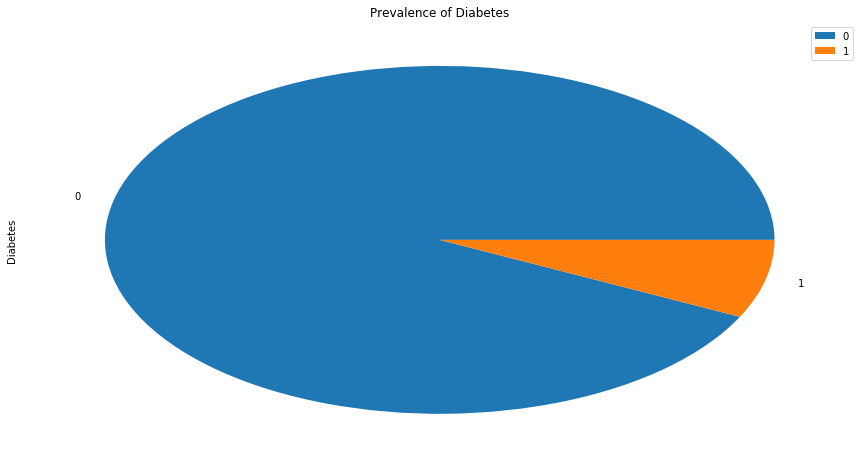

In [60]:
prevalence_of('Diabetes')

Most of the patients do not have diabetes

### Research Question 6 (Prevalence of Hipertension) in show patients dataset

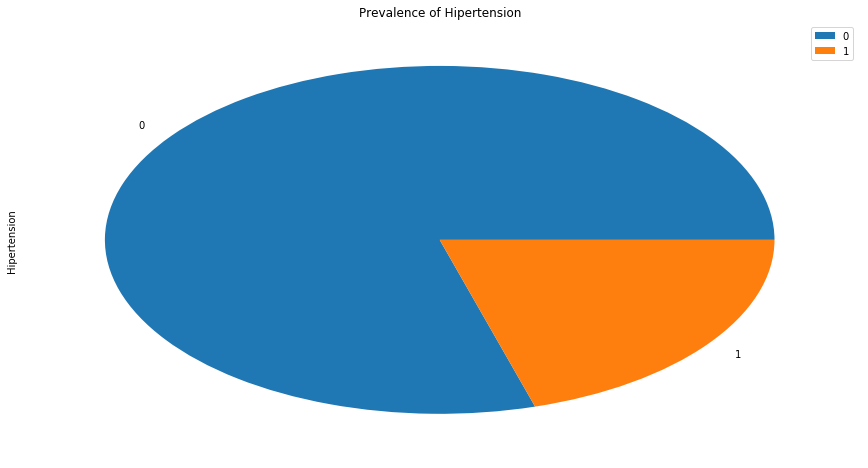

In [61]:
prevalence_of('Hipertension')

Most of the patients do not have hipertension

### Research Question 7 (Prevalence of Alcoholism) in show patients dataset

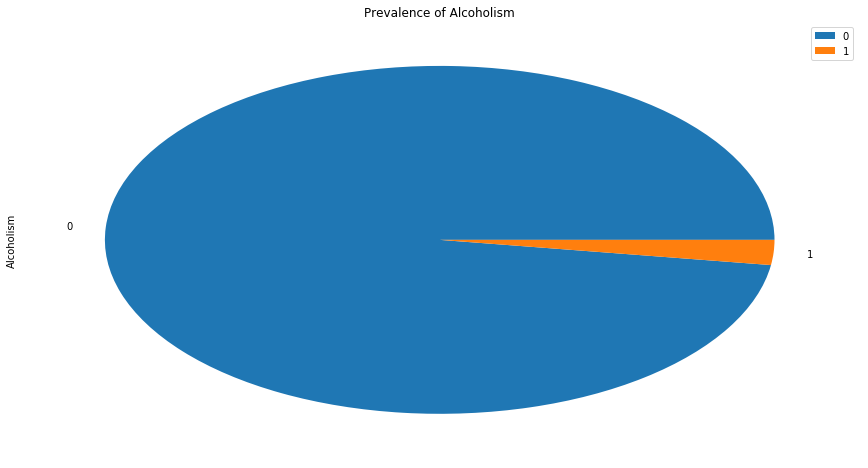

In [62]:
prevalence_of('Alcoholism')

Most of the patients do not have alcoholism

<a id='conclusions'></a>
## Conclusions

Results:

The percentage of patients is more women than men, and this information can be used to determine the quantity and type of magazines and newspapers used in the waiting room.

age has clear influence on showing rate, ages from 0 to 8 are the most showing, then from 45 to 55 and the least showing are patients above 65.

number of showing patients without receiving sms is greater than showing patients with sms.

so we need to revisit our sms company to make our sms more efficient.

Receiving the scholarship is not an indication of the patient's attendance.

the prevalence of chronic disease in showing patients is a little.

Limitations:

1) most of our dataset is categorical so we can't make more statistical analysis.

2) need more information about the mechanism of work in sms company. to make more analysis in this feature



In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0